# 10장. 모델 설계하기

## 1. 모델의 정의

In [2]:
# 딥러닝을 구동하는 데 필요한 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리 불러옴
import numpy as np
import tensorflow as tf

In [3]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
# 준비된 수술 환자 데이터를 불러옴
Data_set=np.loadtxt("/content/ThoraricSurgery.csv",delimiter=",")

In [5]:
# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X=Data_set[:,0:17]
Y=Data_set[:,17]

In [7]:
# 딥러닝 구조를 결정(모델을 설정하고 실행하는 부분)
model=Sequential()
model.add(Dense(30,input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# 딥러닝 실행
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])
model.fit(X,Y,epochs=100,batch_size=10)

Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 0.8449 - accuracy: 0.1511
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.8084 - accuracy: 0.1851
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.7574
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.8511
Epoch 11/

KeyboardInterrupt: 

###(중간에 실행을 임의로 중단시켰습니다.)

model= Sequential()은 딥러닝의 구조를 짜고 층을 설정하는 부분 <br>
model.compile()은 정해진 모델을 컴퓨터가 알아들을 수 있게끔 컴파일 하는 부분 <br>
model.fit()은 모델을 실제로 수행하는 부분

<hr>

## 2. 입력층, 은닉층, 출력층

model=Sequnetial() <br>
model.add(Dense(30,input_dim=17,activation='relu')) <br>
model.add(Dense(1,activation='sigmoid'))

딥러닝: 퍼셉트론 위에 숨겨진 퍼셉트론 층을 차곡차곡 추가하는 형태 <br>
→ 이 층들이 케라스에서는 Sequential() 함수를 통해 쉽게 구현됨 <br>
Sequntial() 함수를 model로 선언하고 model.add() 라인을 추가하면 새로운 층이 만들어짐 <br>

맨 마지막 층: 결과를 출력하는 '출력층', 나머지는 모두 '은닉층'

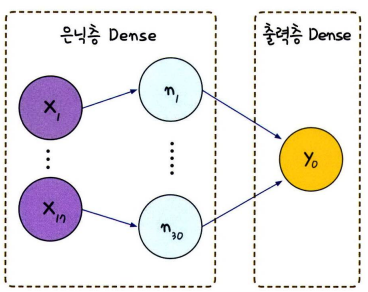

<hr>

## 3. 모델 컴파일

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.compile: 앞서 지정한 모델이 효과적으로 구현될 수 있게 여러 가지 환경을 설정해 주면서 컴파일하는 부분

오차 함수에는 평균 제곱 오차 계열의 함수 외에도 교차 엔트로피 계열의 함수가 있음. <br>
평균 제곱 오차: 수렴하기까지 속도가 많이 걸린다는 단점 <br>
교차 엔트로피: 출력 값에 로그를 취해서, 오차가 커지면 수렴 속도가 빨라지고, 오차가 작아지면 수렴 속도가 감소함

W: 각 층별 가중치(w)들의 집합 <br>
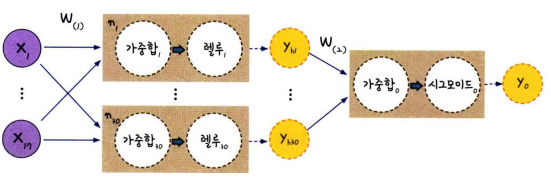

metrics() 함수: 모델이 컴파일될 때 모델 수행 결과를 나타내게끔 설정하는 부분

<hr>

## 4. 교차 엔트로피

binary_crossentropy(이항 교차 엔트로피): 예측 값이 참과 거짓 둘 중 하나인 형식 <br>
얘를 적용하려면 앞 식의 mean_squared_error 자리에 binary_crossentropy를 입력하면 됨 <br>
→ 이를 실행하면 예측 정확도가 약간 향상됨

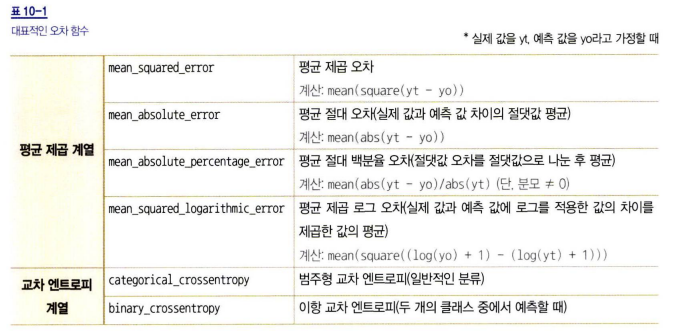

<hr>

## 5. 모델 실행하기

model.fit(X, Y, epochs=100, batch_size=10)

학습 프로세스가 모든 샘플에 대해 한 번 실행되는 것: 1 epoch <br>
코드에서 epochs=100으로 지정한 것은 각 샘플이 처음부터 끝까지 100번 재사용될 때까지 실행을 반복 <br>
batch_size: 샘플을 한번에 몇 개씩 처리할지 정하는 부분 <br>
→ 사이즈가 너무 크면 학습 속도가 느려지고, 너무 작으면 각 실행 값의 편차가 생겨서 전체 결괏값이 불안정해질 수 있음